In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
DATA_FOLDER_PATH = os.getcwd() + '/data/KS VERI/KS10/'

In [7]:
FILE_NAME = 'SIM-KS10 ODASI KLİMA TÜKETİM RAPORU (Kwh).xlsx'

In [8]:
PATH = DATA_FOLDER_PATH + FILE_NAME

In [9]:
ALL_DFS = []
for i in range(1, 21):
    sheet_name = 'Sheet' + str(i)
    
    if i == 1:
        df = pd.read_excel(PATH, sheet_name=sheet_name, skiprows=27, usecols='C:I', header=None)
        df.drop(df.columns[[1,3,4,5]], axis=1, inplace=True)
    else:
        df = pd.read_excel(PATH, sheet_name=sheet_name, skiprows=5, usecols='C:G', header=None)
        df.drop(df.columns[[2,3]], axis=1, inplace=True)
    
    df.columns = [0, 1, 2]
    
    ALL_DFS.append(df)
    
df = pd.concat(ALL_DFS, ignore_index=True)

df.columns = df.iloc[0]
df.drop(df.index[0], inplace=True)
df.reset_index(drop=True, inplace=True)

dates = []
drop_indexes = []

current_month_year = df.columns[0].split('\n')[0][9:]
for row in df.itertuples():
    
    if row[1] == 'Period Totals':
        drop_indexes.append(row[0])
        continue
        
    elif row[1].startswith('Period'):
        current_month_year = row[1].split('\n')[0][9:]
        drop_indexes.append(row[0])
        
    else:
        day = row[1]
        str_date = f'{day} {current_month_year}'

        # convert into datetime object
        # date is like "1 January 2023"
        date = pd.to_datetime(str_date, format='%d %B %Y').date()
        dates.append(date)
        
df.drop(drop_indexes, inplace=True)
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.insert(0, 'Date', dates)

# sort the dataframe by date
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,SIM-KS10 KLİMA,Interval Total
0,2022-03-01,86.698983,86.698983
1,2022-03-02,886.24123,886.24123
2,2022-03-03,886.24123,886.24123
3,2022-03-04,886.241232,886.241232
4,2022-03-05,886.24123,886.24123
...,...,...,...
598,2023-10-25,798,798
599,2023-10-26,805,805
600,2023-10-27,794,794
601,2023-10-28,796,796


In [10]:
# create a list of dates from first date to last date
all_dates = [date.date() for date in
             pd.date_range(start=df['Date'].iloc[0],
                           end=df['Date'].iloc[-1]).tolist()]

# find the lost dates
lost_dates = [date for date in all_dates if date not in df['Date'].tolist()]
for date in lost_dates:
    print(date)

2023-08-09
2023-08-10
2023-08-11
2023-08-12
2023-08-13


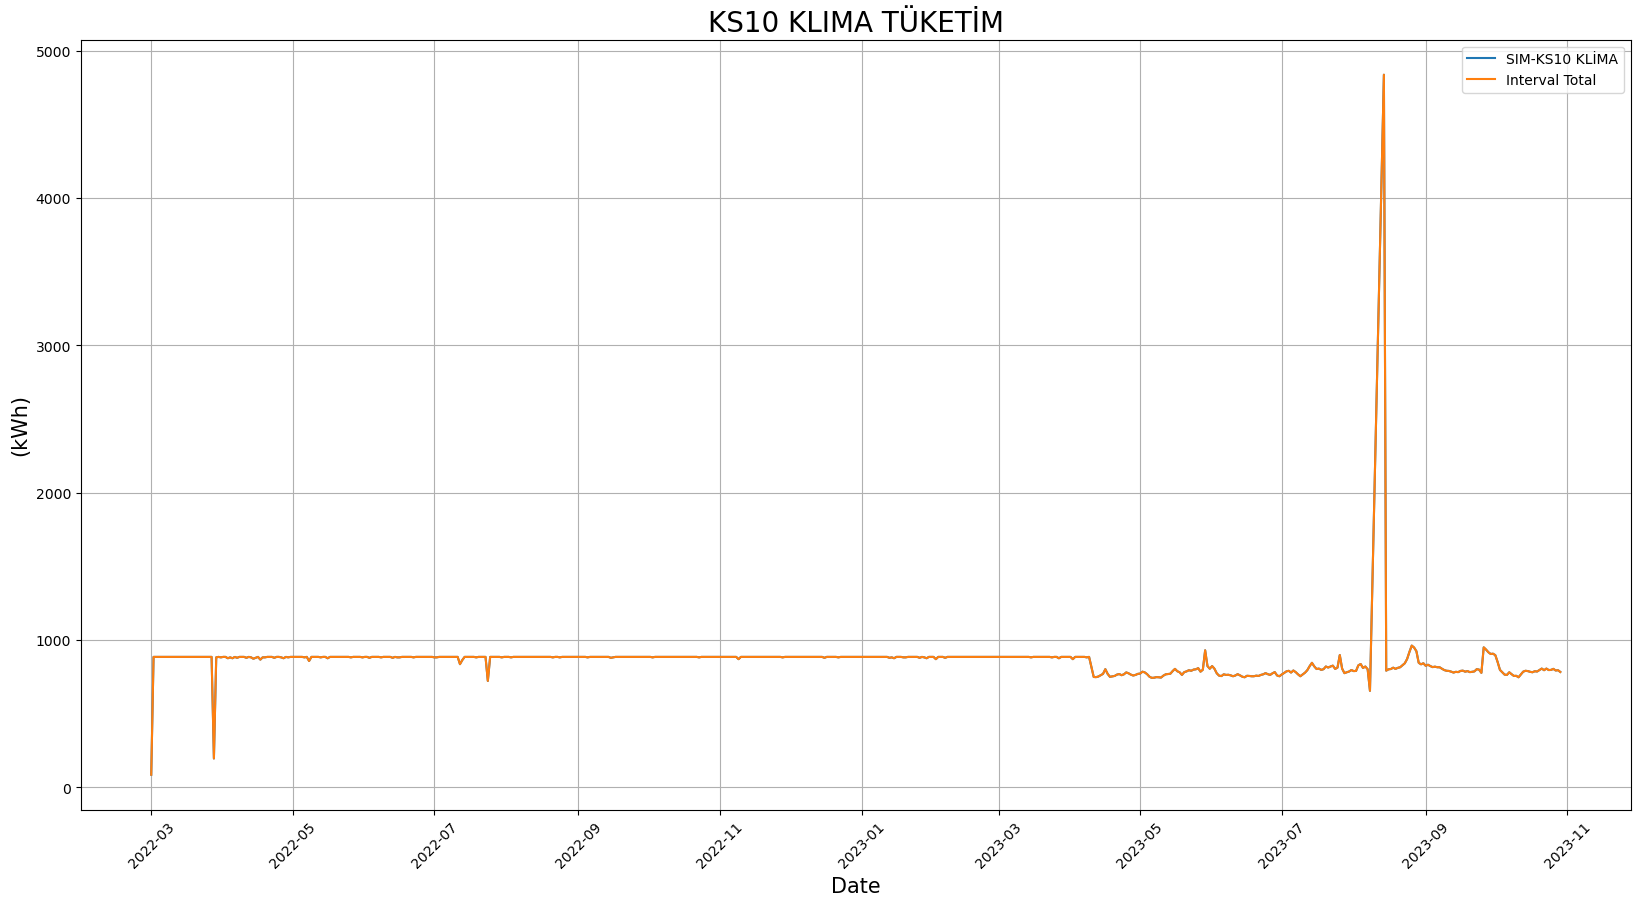

In [11]:
# plot the data with plt library
plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df[df.columns[1:]], label=df.columns[1:])

plt.xlabel('Date', fontsize=15)
plt.ylabel('(kWh)', fontsize=15)
plt.title('KS10 KLIMA TÜKETİM', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [13]:
# save the dataframe as csv file
df.to_csv(os.getcwd() + '/data/KS VERI/CLEAN_DATA/KS10_KLIMA_TUKETIM.csv', index=False)